# Data Description

**datetime** - hourly date + timestamp  
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
**holiday** - whether the day is considered a holiday  
**workingday** - whether the day is neither a weekend nor holiday  
**weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**temp** - temperature in Celsius  
**atemp** - "feels like" temperature in Celsius  
**humidity** - relative humidity  
**windspeed** - wind speed  
**casual** - number of non-registered user rentals initiated  
**registered** - number of registered user rentals initiated  
**count** - number of total rentals

# Part I: Data Manipulation and Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.
data = pd.read_csv("train.csv", parse_dates=['datetime'])

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
#2. Check the data type of each column.
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
#10886 rows are there in the dataset
data.shape

(10886, 12)

In [9]:
#0 missing values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
#3. Using the date column, create new columns for: year, month, day of the week and hour of the day.
data['year'] = data['datetime'].dt.year.astype(str)
data['month'] = data['datetime'].dt.month_name()
data['day_name'] = data['datetime'].dt.day_name()
data['hour'] = data['datetime'].dt.hour

In [11]:
data['is_weekend'] = data['day_name'].isin(['Saturday', 'Sunday']).astype(int)

In [12]:
#4. Rename the values in the season column to spring, summer, fall and winter.
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
data['season'] = data['season'].map(season_map)

In [13]:
#5. Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.
rental_year = data.groupby('year')[['casual', 'registered']].sum().reset_index()
rental_year

,year,casual,registered
0,2011,155817,626162
1,2012,236318,1067179


In [14]:
rental_year_melted = rental_year.melt(id_vars='year', var_name='type', value_name='count')

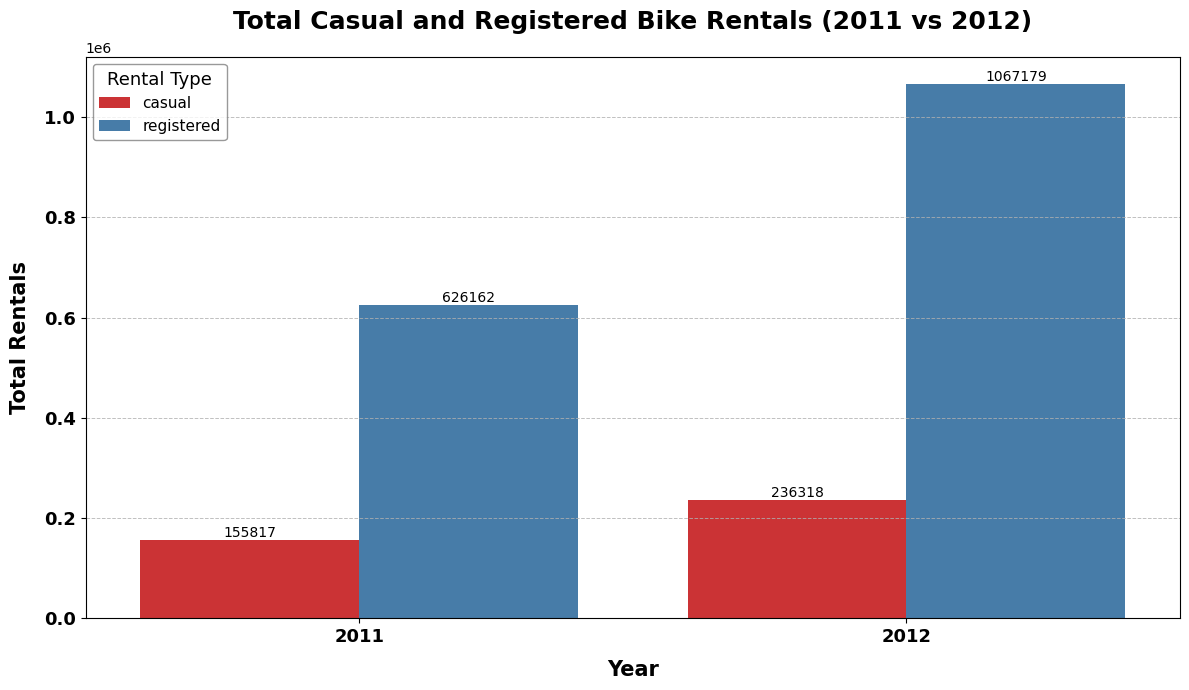

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=rental_year_melted, 
    x='year', 
    y='count', 
    hue='type', 
    palette='Set1'
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

plt.title('Total Casual and Registered Bike Rentals (2011 vs 2012)', fontsize=18, pad=20, weight='bold')
plt.xlabel('Year', fontsize=15, labelpad=10, weight='bold')
plt.ylabel('Total Rentals', fontsize=15, labelpad=10, weight='bold')

plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')

plt.legend(
    title='Rental Type',
    title_fontsize=13,
    fontsize=11,
    loc='upper left',
    frameon=True,
    shadow=False,
    edgecolor='gray'
)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)
plt.show()

In [16]:
#6. Calculate the mean of the hourly total rentals count by season.
rental_season = data.groupby('season')[['count']].mean()
rental_season

,count
season,
fall,234.417124
spring,116.343261
summer,215.251372
winter,198.988296


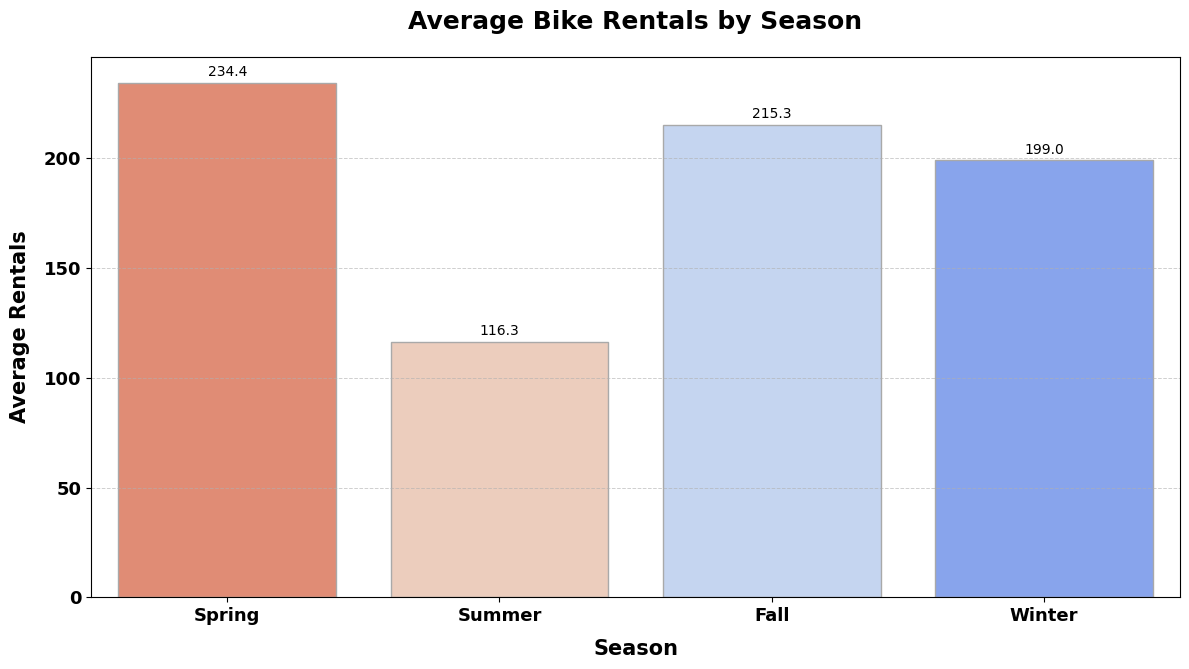

In [17]:
plt.figure(figsize=(12, 7))

sns.barplot(
    data=rental_season.reset_index(),
    x='season',
    y='count',
    hue='season',
    palette='coolwarm_r', 
    dodge=False,
    edgecolor='darkgray', 
    saturation=0.8  
)

plt.title('Average Bike Rentals by Season', fontsize=18, pad=20, weight='bold')
plt.xlabel('Season', fontsize=15, labelpad=10, weight='bold')
plt.ylabel('Average Rentals', fontsize=15, labelpad=10, weight='bold')

plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Spring', 'Summer', 'Fall', 'Winter'],
    fontsize=13, weight='bold'
)
plt.yticks(fontsize=13, weight='bold')

for i, value in enumerate(rental_season['count']):
    plt.text(i, value + 3, f'{value:.1f}', ha='center', fontsize=10)
    
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

plt.legend([], [], frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

In [18]:
#Autumn has the highest mean.
rental_season.idxmax()

count    fall
dtype: object

In [19]:
#7. More bikes rented by registered users on working days.
#For non-registered users, they rented more bikes on non-working days.
#The answer is same for both years.
rental_working = data.groupby(['workingday', 'year'])[['casual', 'registered']].mean()
rental_working

casual  registered
workingday year                       
0          2011  48.201276   97.153132
           2012  70.250286  160.767429
1          2011  19.664143  124.031909
           2012  30.527733  211.587507

In [20]:
print(data['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [21]:
rental_working_reset = rental_working.reset_index()
rental_working_melted = rental_working_reset.melt(
    id_vars=['workingday', 'year'], 
    value_vars=['casual', 'registered'], 
    var_name='type', 
    value_name='count'
)

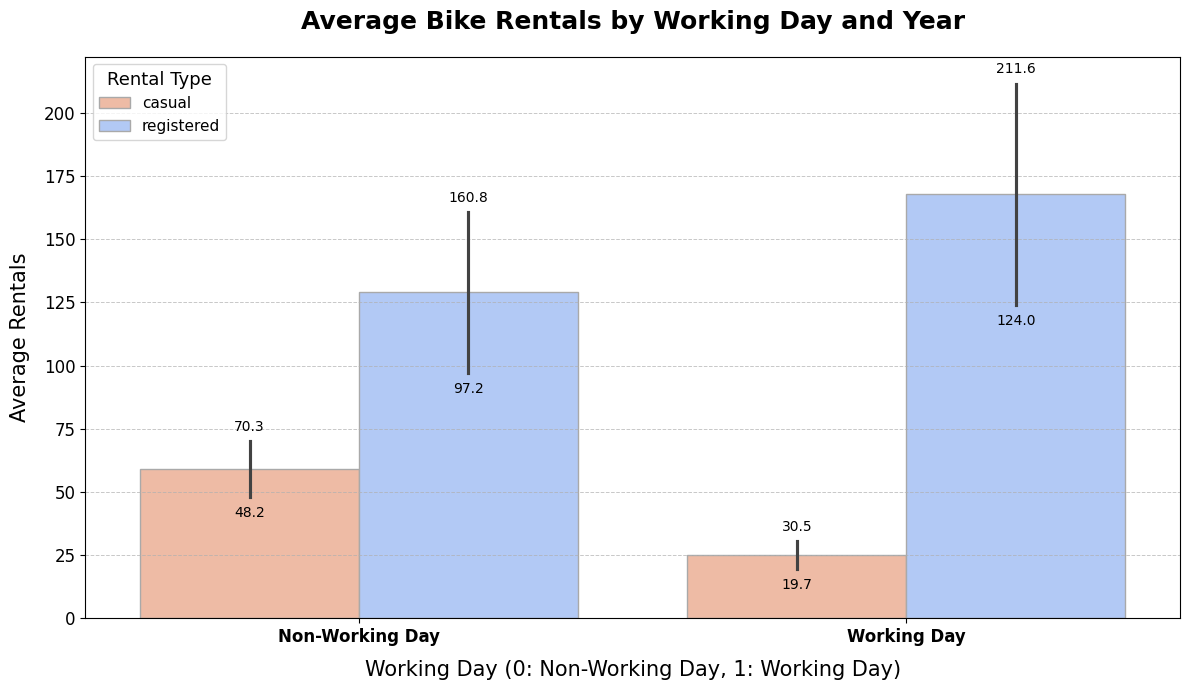

In [22]:
plt.figure(figsize=(12, 7))

sns.barplot(
    data=rental_working_melted,
    x='workingday',
    y='count',
    hue='type',
    palette='coolwarm_r', 
    dodge=True,
    edgecolor='darkgray', 
    saturation=0.8  
)

plt.title('Average Bike Rentals by Working Day and Year', fontsize=18, pad=20, weight='bold')
plt.xlabel('Working Day (0: Non-Working Day, 1: Working Day)', fontsize=15, labelpad=10)
plt.ylabel('Average Rentals', fontsize=15, labelpad=10)

plt.xticks(
    ticks=[0, 1],
    labels=['Non-Working Day', 'Working Day'],
    fontsize=12,
    weight='bold'
)

plt.yticks(fontsize=12)

for index, row in rental_working_melted.iterrows():
    x_pos = (
        row['workingday'] - 0.2 if row['type'] == 'casual' 
        else row['workingday'] + 0.2
    )

    y_offset = 4 if row['year'] == '2012' else -8
    
    plt.text(
        x=x_pos, 
        y=row['count'] + y_offset,
        s=f"{row['count']:.1f}", 
        ha='center', 
        fontsize=10 
    )


plt.legend(
    title='Rental Type',
    title_fontsize=13,
    fontsize=11,
    loc='upper left',
    frameon=True,
    shadow=False
)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
#8. July in the year 2011 has the highest total number of bikes rented and January has the lowest.
rental_month_2011 = data[data['year'] == '2011'].groupby('month')['count'].sum()

In [24]:
rental_month_2011.idxmax()

'July'

In [25]:
rental_month_2011.idxmin()

'January'

In [26]:
#September in the year 2012 has the highest total number of bikes rented and January has the lowest.
rental_month_2012 = data[data['year'] == '2012'].groupby('month')['count'].sum()

In [27]:
rental_month_2012.idxmax()

'September'

In [28]:
rental_month_2012.idxmin()

'January'

In [29]:
max_2011 = rental_month_2011.idxmax()
min_2011 = rental_month_2011.idxmin()
max_2012 = rental_month_2012.idxmax()
min_2012 = rental_month_2012.idxmin()
print(f"2011: Highest rentals in {max_2011}, lowest in {min_2011}")
print(f"2012: Highest rentals in {max_2012}, lowest in {min_2012}")

2011: Highest rentals in July, lowest in January
2012: Highest rentals in September, lowest in January


In [30]:
#9. Clear, Few clouds, Partly cloudy, Partly cloudy weather types has the highest mean hourly rental count.
#Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather types has the lowest mean hourly rental count.
rental_weather = data.groupby('weather')['count'].mean()

In [31]:
rental_weather.idxmax()

1

In [32]:
rental_weather.idxmin()

3

In [33]:
#10. Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset.
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

In [34]:
##Registered has the highest correlation with the total rentals count.
correlation['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
is_weekend   -0.009925
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

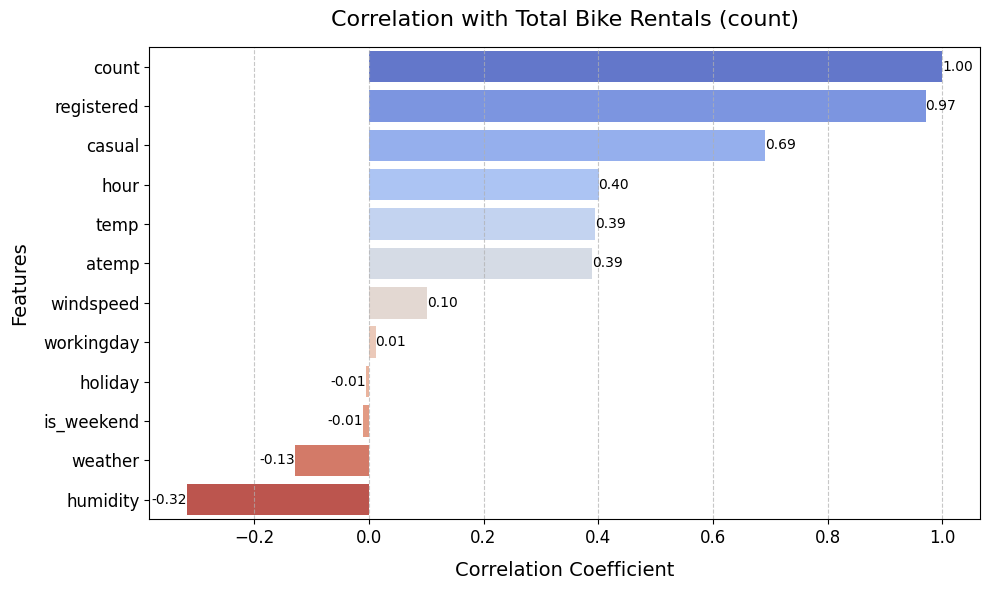

In [35]:
plt.figure(figsize=(10, 6))

correlation_sorted = correlation['count'].sort_values(ascending=False).reset_index()
correlation_sorted.columns = ['Feature', 'Correlation']

sns.barplot(
    data=correlation_sorted,
    y='Feature',
    x='Correlation',
    palette='coolwarm',
    hue='Feature',
    dodge=False
)

plt.legend([], [], frameon=False)

plt.title('Correlation with Total Bike Rentals (count)', fontsize=16, pad=15)
plt.xlabel('Correlation Coefficient', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, row in correlation_sorted.iterrows():
    plt.text(
        x=row['Correlation'], 
        y=index, 
        s=f"{row['Correlation']:.2f}", 
        va='center', 
        ha='left' if row['Correlation'] > 0 else 'right', 
        fontsize=10, 
        color='black'
    )

plt.tight_layout()
plt.show()

In [36]:
#11. Create a new categorical column called day_period, which can take four possible values:
#night, morning, afternoon and evening.
#These values correspond to the following binning of the hour column:
#0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
data['day_period'] = pd.cut(data['hour'], bins=bins, labels=labels, right=False)

In [37]:
#12. Generate a pivot table for the mean of the hourly total rentals count,
#with the index set to the day period and the column set to the working day column.
#On working days users rented more bikes during morning and evening.
#On non-working days users rented more bikes during night and afternoon.
pivot_table = data.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')
pivot_table

workingday,0,1
day_period,,
night,44.052083,16.217582
morning,157.772414,234.353763
afternoon,371.022989,266.196141
evening,180.182759,251.054662


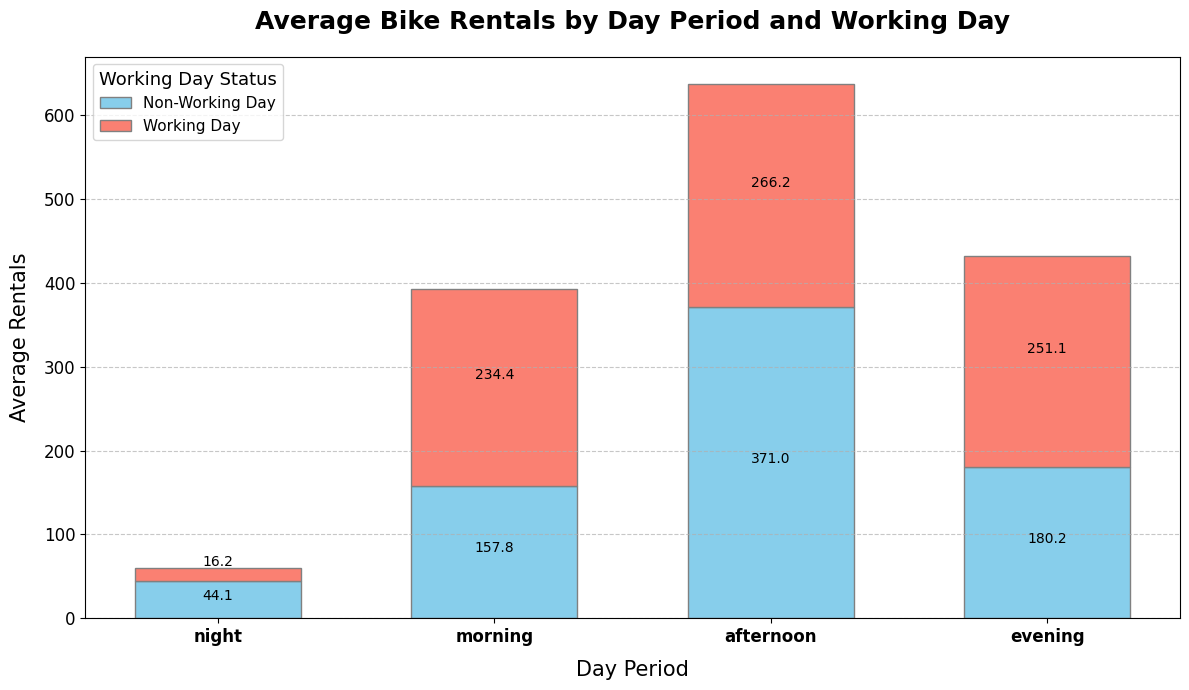

In [38]:
pivot_table_reset = pivot_table.reset_index()

plt.figure(figsize=(12, 7))

bar_width = 0.6
x = pivot_table_reset['day_period']

plt.bar(
    x=x, 
    height=pivot_table_reset[0], 
    color='skyblue', 
    label='Non-Working Day', 
    width=bar_width, 
    edgecolor='grey'
)
plt.bar(
    x=x, 
    height=pivot_table_reset[1], 
    bottom=pivot_table_reset[0], 
    color='salmon', 
    label='Working Day', 
    width=bar_width, 
    edgecolor='grey'
)

plt.title('Average Bike Rentals by Day Period and Working Day', fontsize=18, pad=20, weight='bold')
plt.xlabel('Day Period', fontsize=15, labelpad=10)
plt.ylabel('Average Rentals', fontsize=15, labelpad=10)

plt.xticks(ticks=range(len(x)), labels=x, fontsize=12, weight='bold')

plt.yticks(fontsize=12)

plt.legend(
    title='Working Day Status',
    title_fontsize=13,
    fontsize=11,
    loc='upper left',
    frameon=True,
    shadow=False
)

for i, day in enumerate(x):
    non_working_value = pivot_table_reset.loc[i, 0]
    working_value = pivot_table_reset.loc[i, 1]
    plt.text(i, non_working_value / 2, f"{non_working_value:.1f}", ha='center', fontsize=10, color='black')
    plt.text(i, non_working_value + working_value / 2 + 10, f"{working_value:.1f}", ha='center', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_name,hour,is_weekend,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,Saturday,0,1,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,Saturday,1,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,Saturday,2,1,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,Saturday,3,1,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,Saturday,4,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,Wednesday,19,0,evening
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,Wednesday,20,0,evening
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,Wednesday,21,0,evening
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,Wednesday,22,0,evening


# Part II: Data Visualisation

In [40]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)

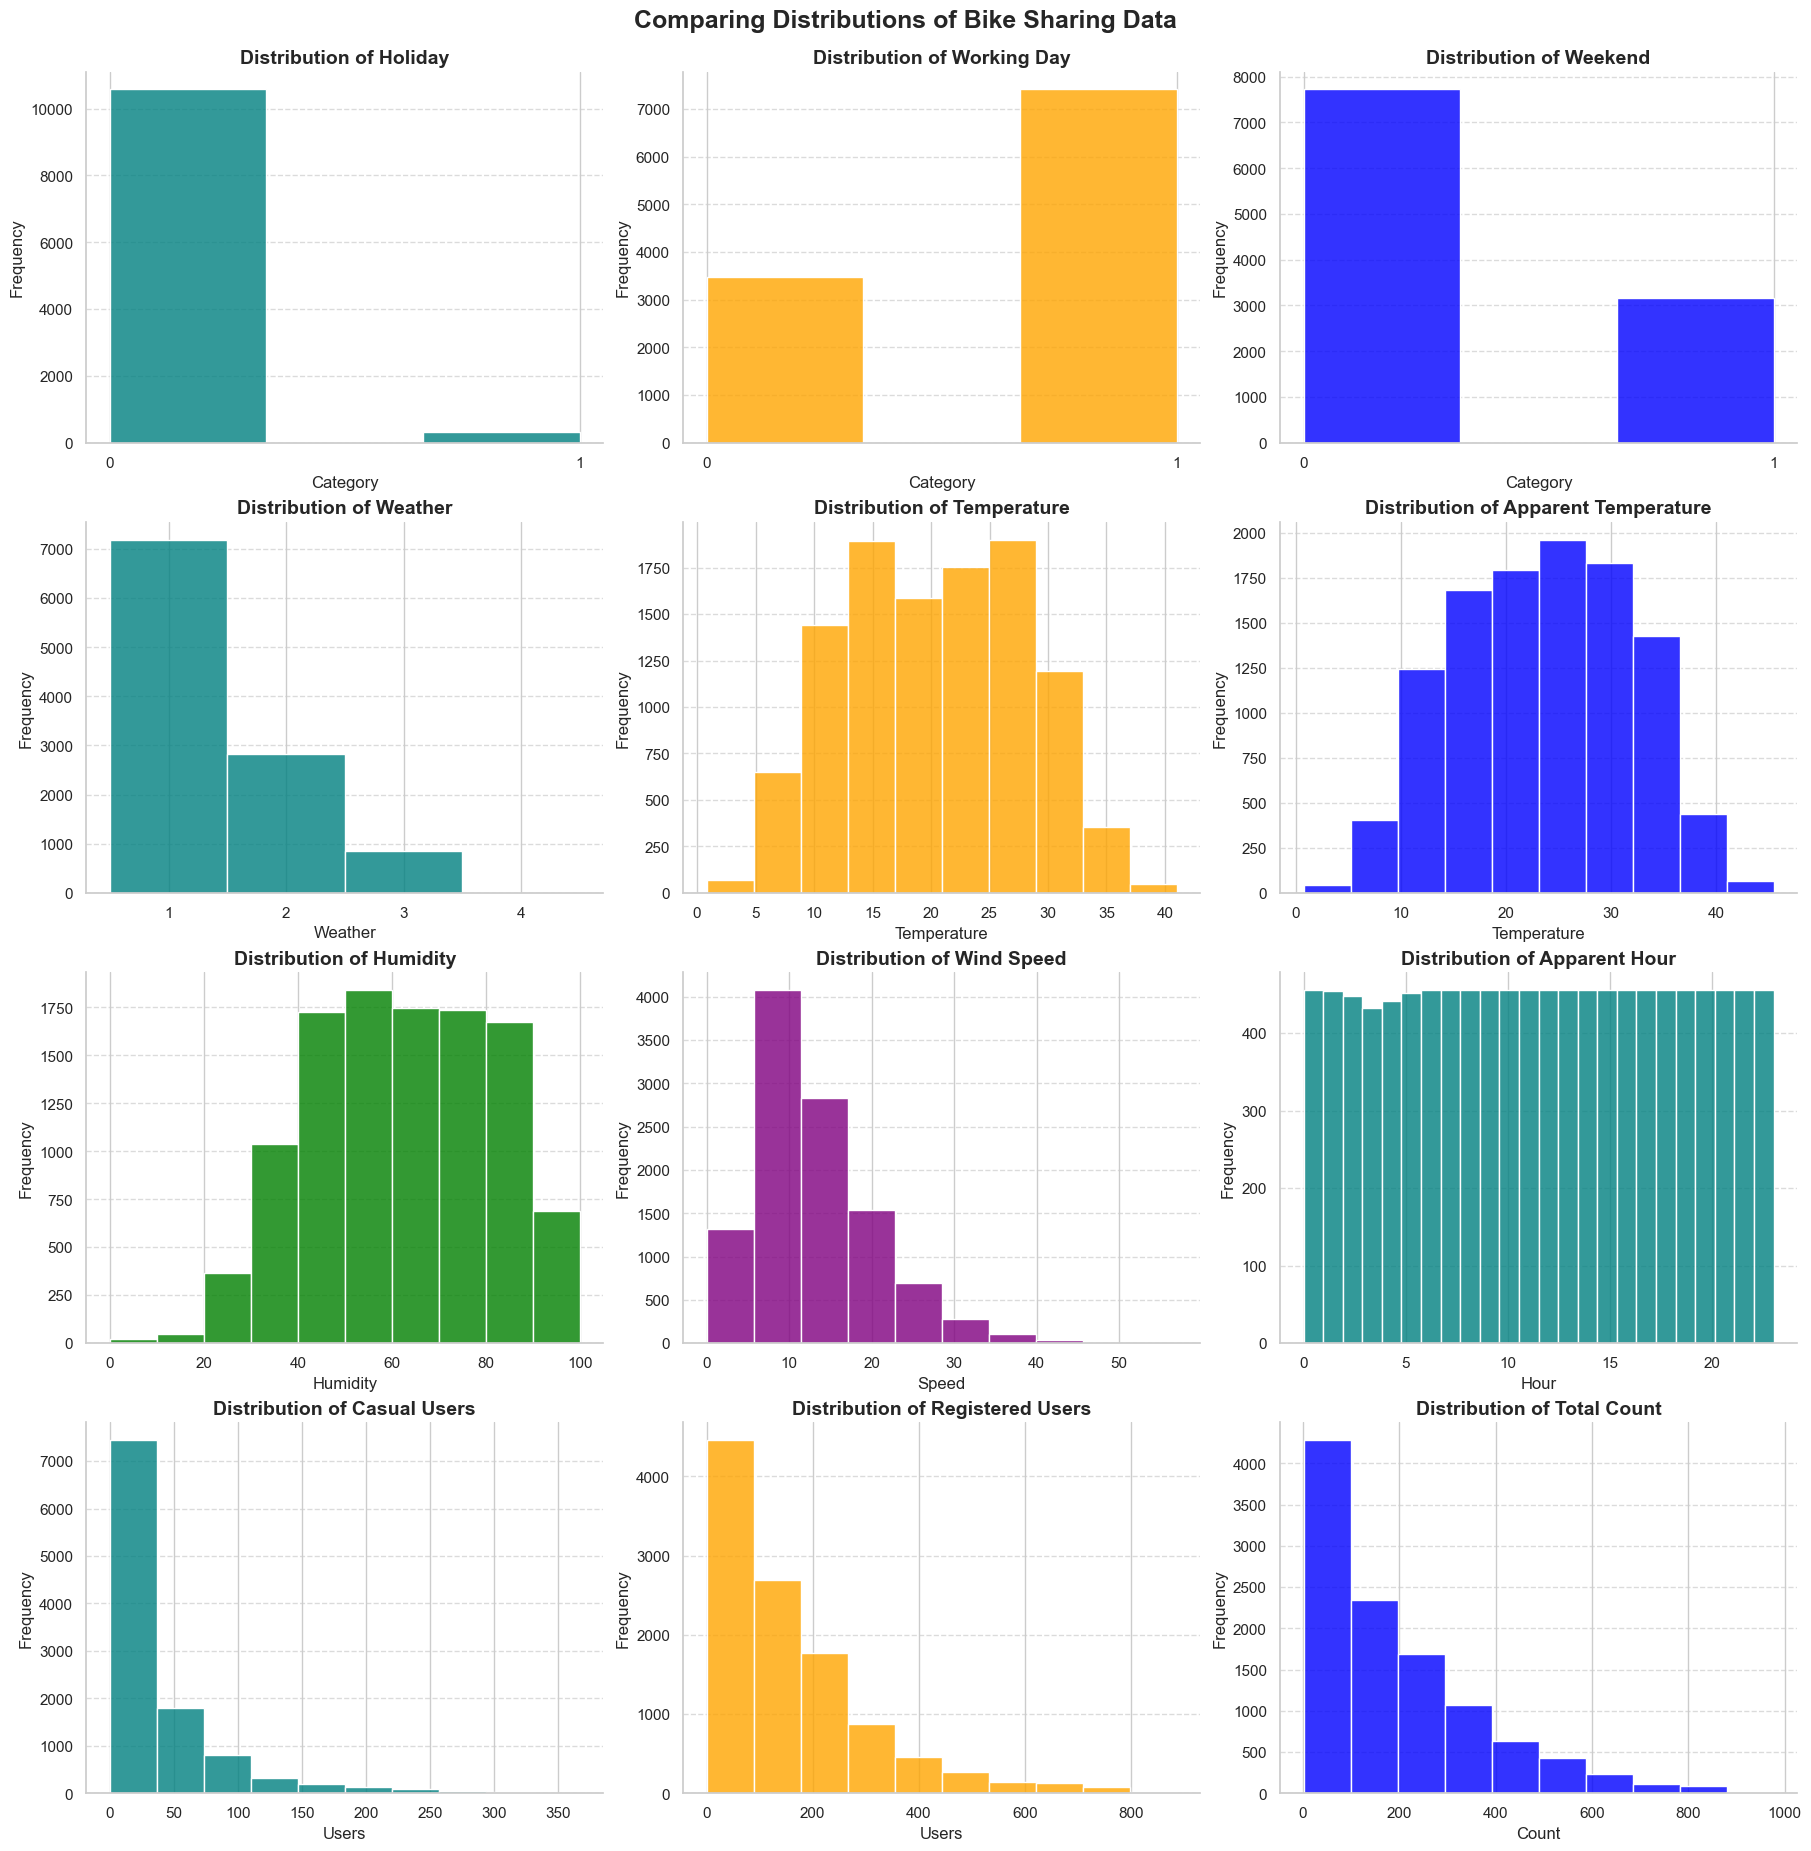

In [41]:
#1. Plot the distributions of all the numerical columns in the dataset using histograms.
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18, 18), constrained_layout=True)

ax = ax.flatten()

#Group1
sns.histplot(x='holiday', data=data, bins=3, color='teal', alpha=0.8, kde=False, ax=ax[0])
sns.histplot(x='workingday', data=data, bins=3, color='orange', alpha=0.8, kde=False, ax=ax[1])
sns.histplot(x='is_weekend', data=data, bins=3, color='blue', alpha=0.8, kde=False, ax=ax[2])

titles = ["Distribution of Holiday", "Distribution of Working Day", "Distribution of Weekend"]

for i, a in enumerate(ax[:3]):
    a.set_title(titles[i], fontsize=14, fontweight='bold')
    a.set_xlabel("Category", fontsize=12)
    a.set_ylabel("Frequency", fontsize=12)
    a.set_xticks([0, 1])
    a.grid(axis='y', linestyle='--', alpha=0.7)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

#Group2
sns.histplot(x='weather', data=data, bins=[0.5, 1.5, 2.5, 3.5, 4.5], color='teal', alpha=0.8, kde=False, ax=ax[3])
sns.histplot(x='temp', data=data, bins=10, color='orange', alpha=0.8, kde=False, ax=ax[4])
sns.histplot(x='atemp', data=data, bins=10, color='blue', alpha=0.8, kde=False, ax=ax[5])
sns.histplot(x='humidity', data=data, bins=10, color='green', alpha=0.8, kde=False, ax=ax[6])
sns.histplot(x='windspeed', data=data, bins=10, color='purple', alpha=0.8, kde=False, ax=ax[7])
sns.histplot(x='hour', data=data, bins=24, color='teal', alpha=0.8, kde=False, ax=ax[8])

titles2 = [
    "Distribution of Weather", "Distribution of Temperature", "Distribution of Apparent Temperature", 
    "Distribution of Humidity", "Distribution of Wind Speed", "Distribution of Apparent Hour"
]

for i, a in enumerate(ax[3:9]):
    a.set_title(titles2[i], fontsize=14, fontweight='bold')
    a.set_xlabel(titles2[i].split(' ')[-1], fontsize=12)
    a.set_ylabel("Frequency", fontsize=12)
    a.grid(axis='y', linestyle='--', alpha=0.7)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

ax[3].set_xticks([1, 2, 3, 4])

#Group3
sns.histplot(x='casual', data=data, bins=10, color='teal', alpha=0.8, kde=False, ax=ax[9])
sns.histplot(x='registered', data=data, bins=10, color='orange', alpha=0.8, kde=False, ax=ax[10])
sns.histplot(x='count', data=data, bins=10, color='blue', alpha=0.8, kde=False, ax=ax[11])

titles3 = [
    "Distribution of Casual Users", "Distribution of Registered Users", "Distribution of Total Count"
]

for i, a in enumerate(ax[9:12]):
    a.set_title(titles3[i], fontsize=14, fontweight='bold')
    a.set_xlabel(titles3[i].split(' ')[-1], fontsize=12)
    a.set_ylabel("Frequency", fontsize=12)
    a.grid(axis='y', linestyle='--', alpha=0.7)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

fig.suptitle("Comparing Distributions of Bike Sharing Data", fontsize=18, fontweight='bold', y=1.02)

plt.show()

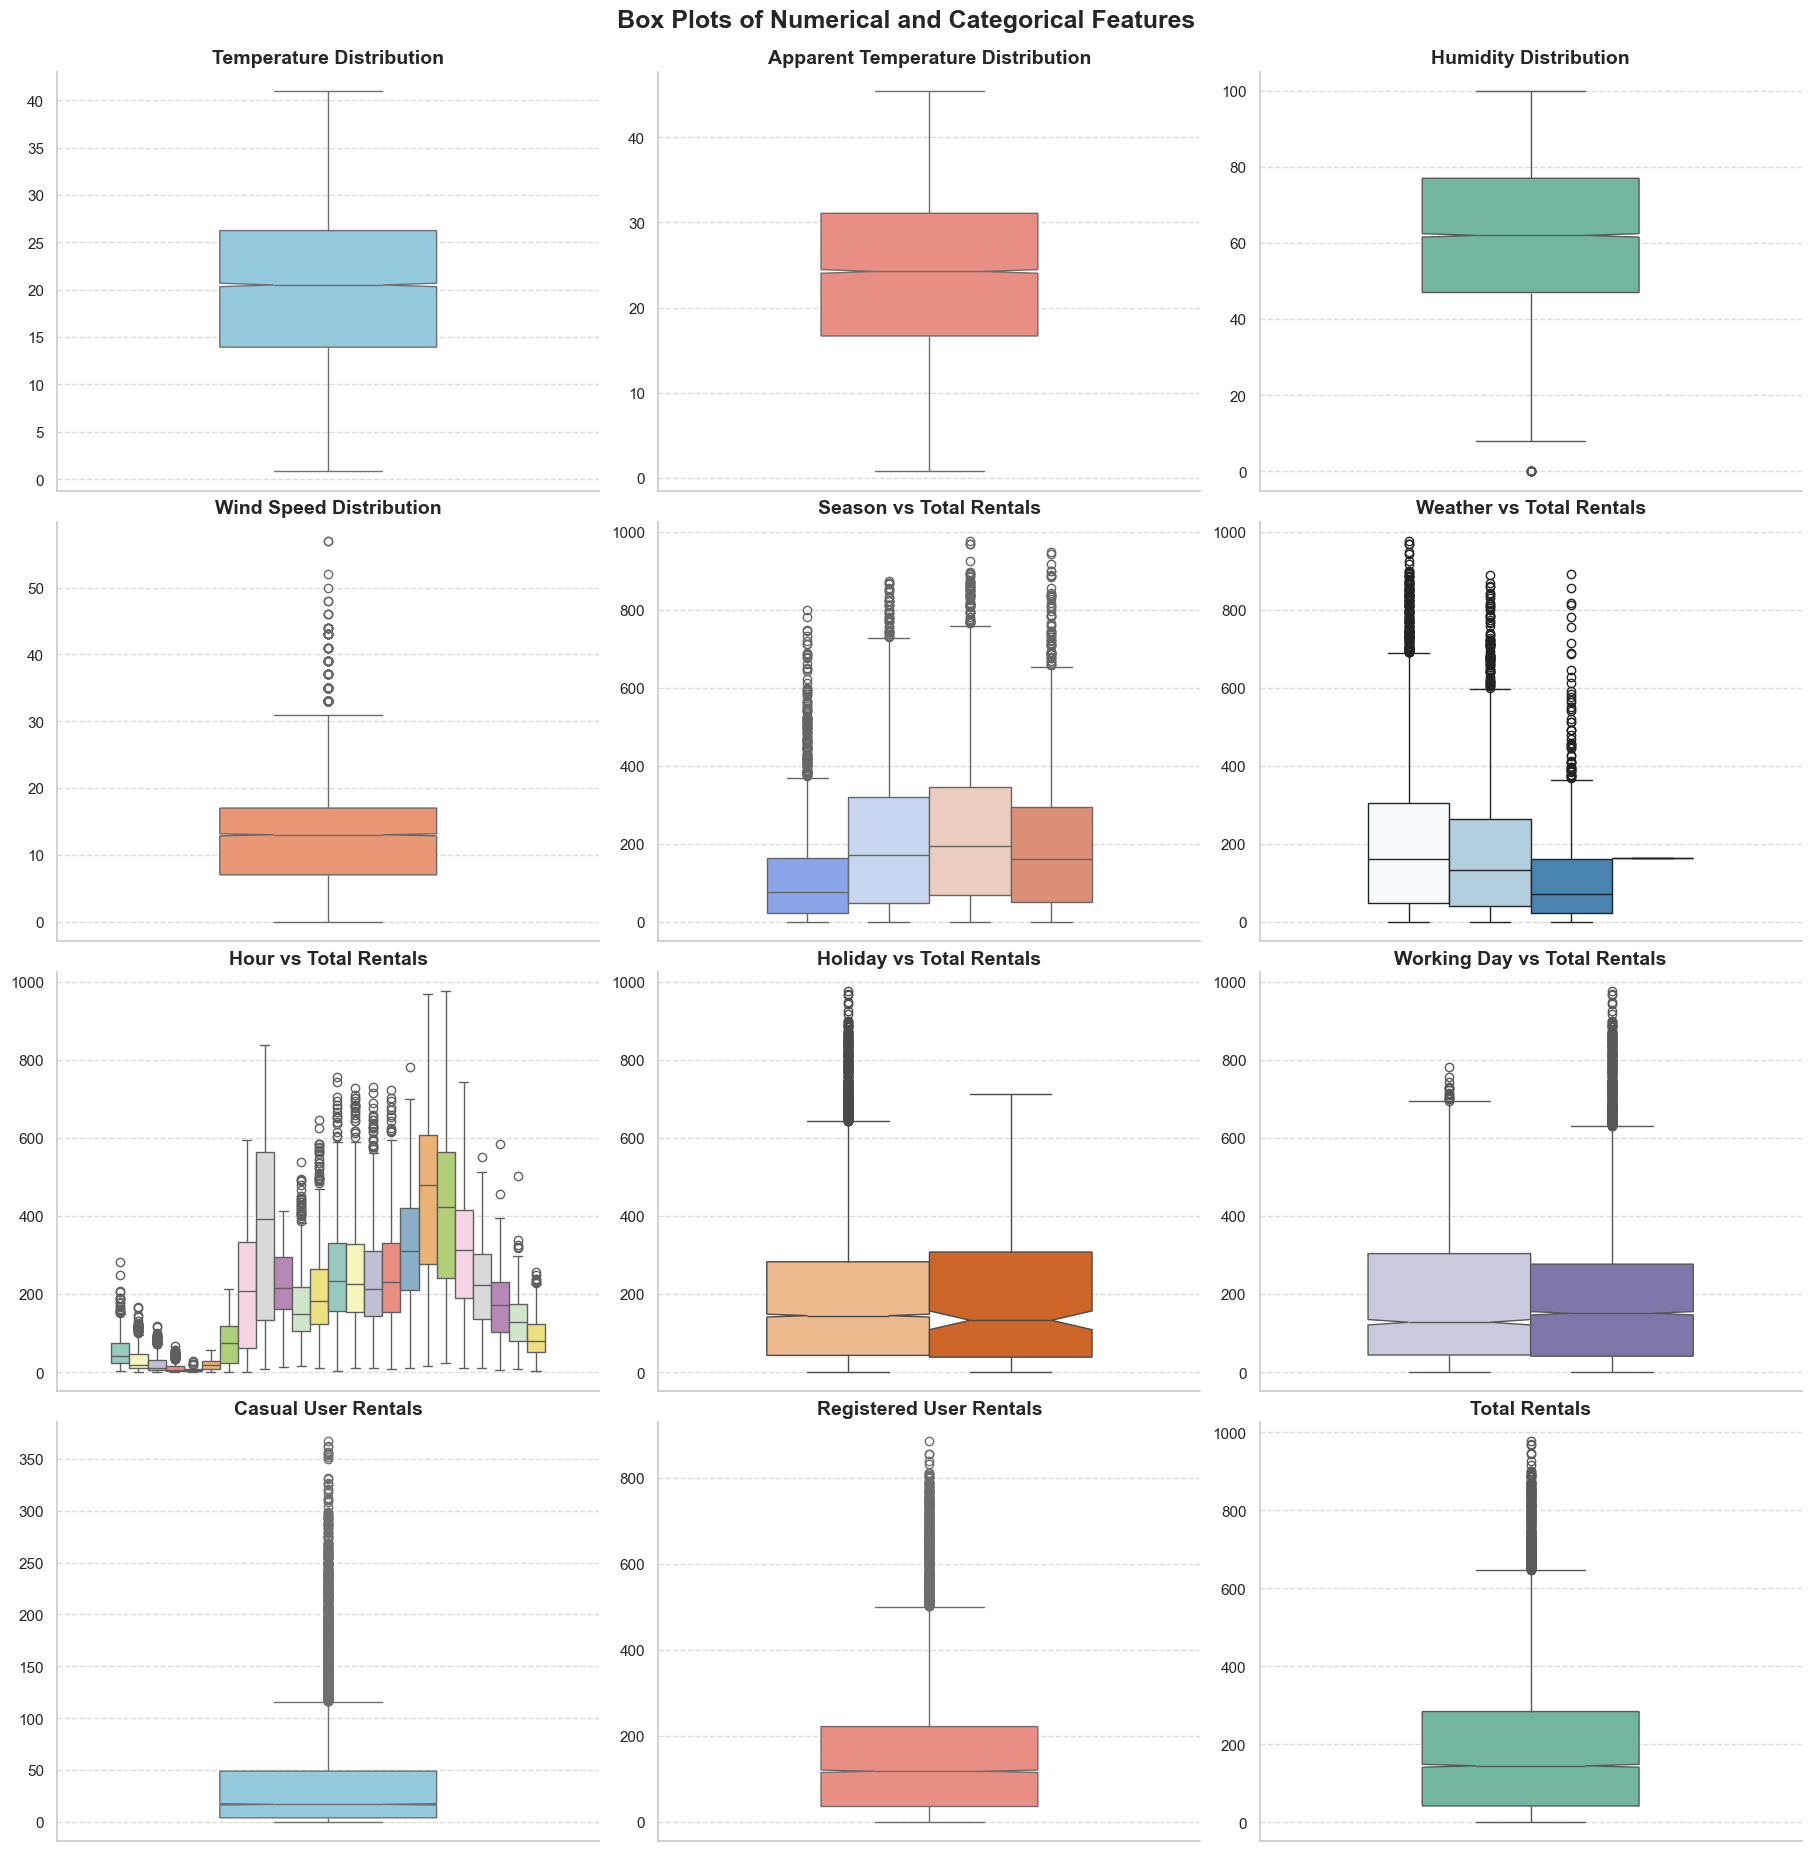

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18, 18), constrained_layout=True)
ax = ax.flatten()

sns.boxplot(y='temp', data=data, ax=ax[0], color='skyblue',width=0.4, notch=True, dodge=False, legend=False)
sns.boxplot(y='atemp', data=data, ax=ax[1], color='salmon',width=0.4, notch=True, dodge=False, legend=False)
sns.boxplot(y='humidity', data=data, ax=ax[2], color='#66c2a5',width=0.4, notch=True, dodge=False, legend=False)
sns.boxplot(y='windspeed', data=data, ax=ax[3], color='#fc8d62',width=0.4, notch=True, dodge=False, legend=False)

sns.boxplot(hue='season', y='count', data=data, ax=ax[4], palette='coolwarm',width=0.6, legend=False)
sns.boxplot(hue='weather', y='count', data=data, ax=ax[5], palette='Blues',width=0.6, legend=False)
sns.boxplot(hue='hour', y='count', data=data, ax=ax[6], palette='Set3',width=0.8, legend=False)
sns.boxplot(hue='holiday', y='count', data=data, ax=ax[7], palette='Oranges',width=0.6, notch=True, legend=False)
sns.boxplot(hue='workingday', y='count', data=data, ax=ax[8], palette='Purples',width=0.6, notch=True, legend=False)

sns.boxplot(y='casual', data=data, ax=ax[9], color='skyblue',width=0.4, notch=True, dodge=False, legend=False)
sns.boxplot(y='registered', data=data, ax=ax[10], color='salmon',width=0.4, notch=True, dodge=False, legend=False)
sns.boxplot(y='count', data=data, ax=ax[11], color='#66c2a5',width=0.4, notch=True, dodge=False, legend=False)

titles = [
    "Temperature Distribution", "Apparent Temperature Distribution", "Humidity Distribution", "Wind Speed Distribution",
    "Season vs Total Rentals", "Weather vs Total Rentals", "Hour vs Total Rentals",
    "Holiday vs Total Rentals", "Working Day vs Total Rentals",
    "Casual User Rentals", "Registered User Rentals", "Total Rentals"
]

for i, a in enumerate(ax):
    a.set_title(titles[i], fontsize=14, fontweight='bold')
    a.set_xlabel("")
    a.set_ylabel("")
    a.grid(axis='y', linestyle='--', alpha=0.7)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

fig.suptitle("Box Plots of Numerical and Categorical Features", fontsize=18, fontweight='bold', y=1.02)
plt.show()

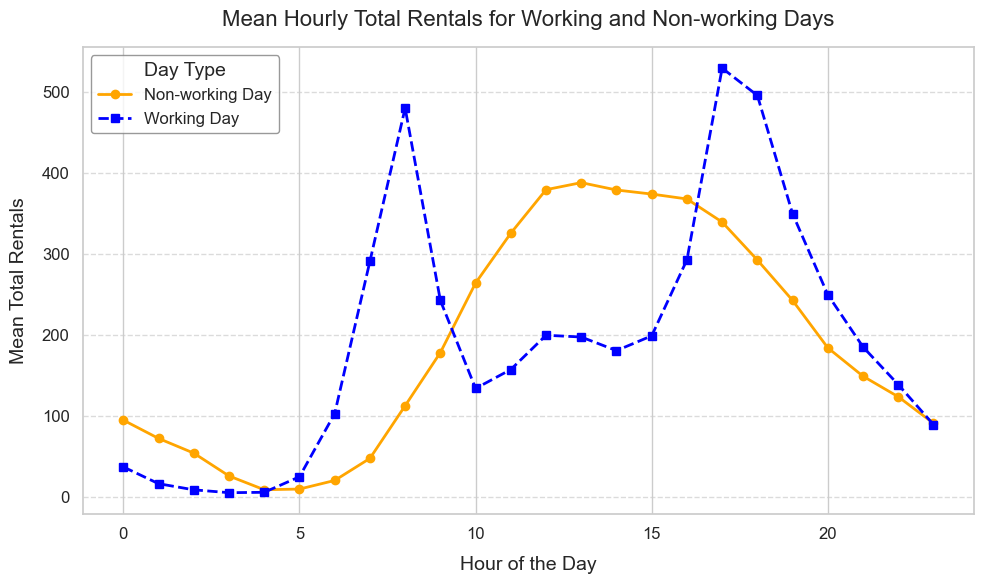

In [43]:
#3. Plot the the mean of the hourly total rentals count for working and non-working days.
workingday_hourly = data.groupby(['hour', 'workingday'])['count'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(
    workingday_hourly[workingday_hourly['workingday'] == 0]['hour'],
    workingday_hourly[workingday_hourly['workingday'] == 0]['count'],
    label='Non-working Day', color='orange', linestyle='-', marker='o', linewidth=2
)

plt.plot(
    workingday_hourly[workingday_hourly['workingday'] == 1]['hour'],
    workingday_hourly[workingday_hourly['workingday'] == 1]['count'],
    label='Working Day', color='blue', linestyle='--', marker='s', linewidth=2
)

plt.title('Mean Hourly Total Rentals for Working and Non-working Days', fontsize=16, pad=15)
plt.xlabel('Hour of the Day', fontsize=14, labelpad=10)
plt.ylabel('Mean Total Rentals', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(
    title='Day Type', fontsize=12, title_fontsize=14, loc='upper left',
    frameon=True, shadow=False, edgecolor='grey'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

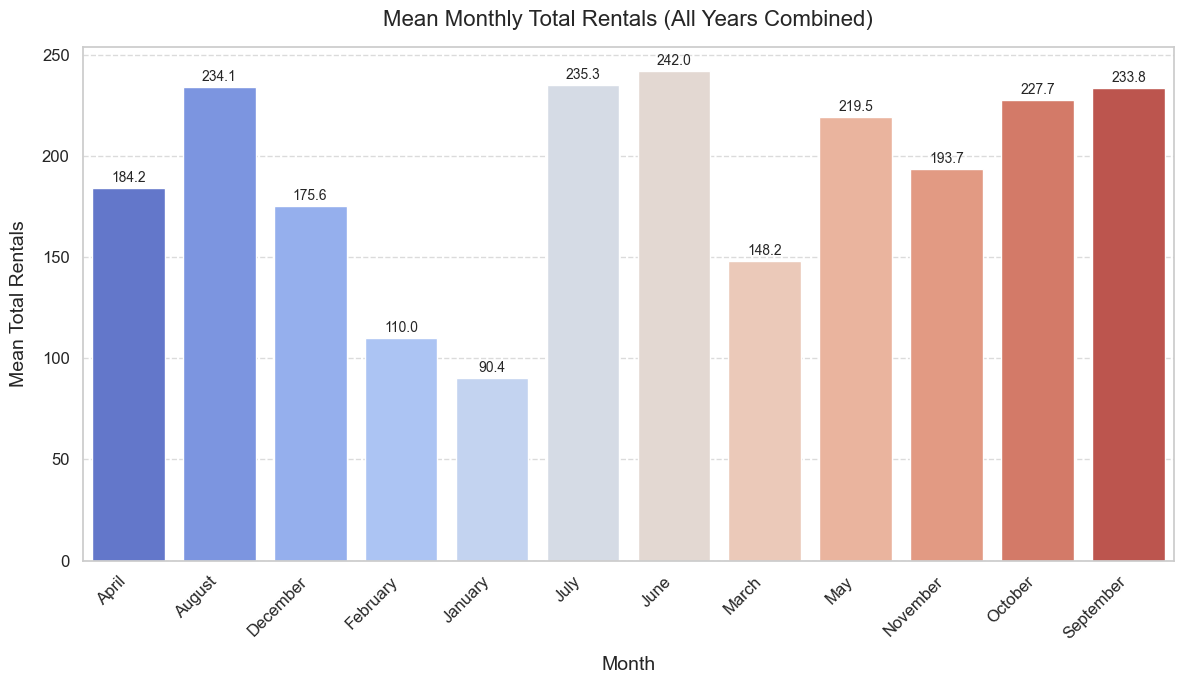

In [44]:
#4. Plot the the mean of the hourly total rentals count for the different months for both years combined.
rental_month = data.groupby('month')['count'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=rental_month,
            x='month',
            y='count',
            hue='month',
            dodge=False,
            palette='coolwarm',
            legend=False)

plt.title('Mean Monthly Total Rentals (All Years Combined)', fontsize=16, pad=15)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Mean Total Rentals', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

for i, value in enumerate(rental_month['count']):
    plt.text(i, value + 3, f'{value:.1f}', ha='center', fontsize=10)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

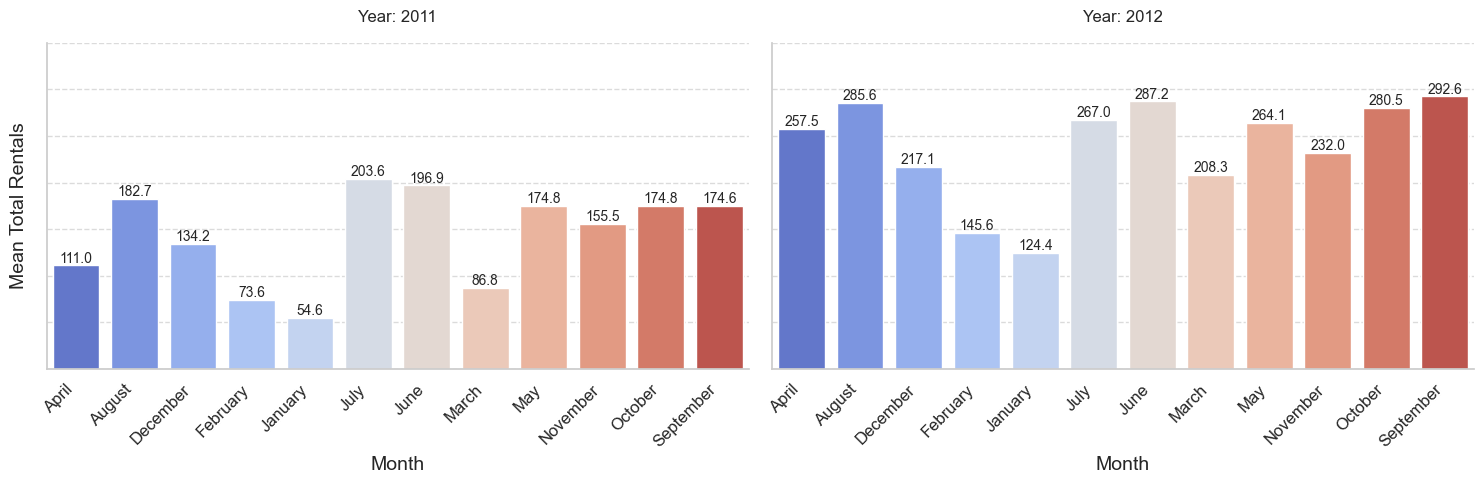

In [45]:
#5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.
rental_month_year = data.groupby(['month', 'year'])['count'].mean().reset_index()

g = sns.FacetGrid(rental_month_year, col='year', height=5, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot,
                x='month',
                y='count',
                hue='month',
                dodge=False,
                palette='coolwarm',
                legend=False)

g.set_titles('Year: {col_name}', fontsize=16, pad=15)
g.set_axis_labels('Month', 'Mean Total Rentals', fontsize=14)
g.set_xticklabels(rotation=45, fontsize=12, ha='right')
g.set_yticklabels(fontsize=12)

for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            bar_value = bar.get_height()
            bar_label = f'{bar_value:.1f}'
            bar_x = bar.get_x() + bar.get_width() / 2
            if bar_value > 0:
                ax.text(
                    bar_x, 
                    bar_value + 3, 
                    bar_label, 
                    ha='center', 
                    fontsize=10
                )

for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

g.tight_layout()
plt.show()

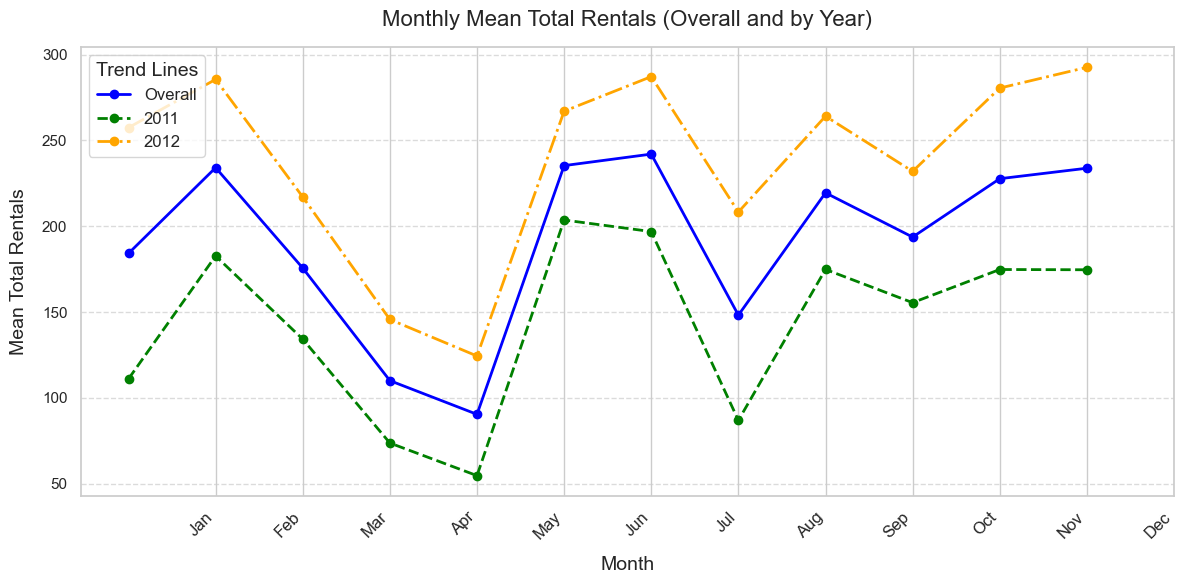

In [46]:
rental_month = data.groupby('month')['count'].mean() 
rental_2011 = data[data['year'] == "2011"].groupby('month')['count'].mean()
rental_2012 = data[data['year'] == "2012"].groupby('month')['count'].mean()

plt.figure(figsize=(12, 6))

plt.plot(
    rental_month.index, rental_month,
    marker='o', linestyle='-', color='blue', linewidth=2, label='Overall'
)

#2011
plt.plot(
    rental_2011.index, rental_2011,
    marker='o', linestyle='--', color='green', linewidth=2, label='2011'
)

#2012
plt.plot(
    rental_2012.index, rental_2012,
    marker='o', linestyle='-.', color='orange', linewidth=2, label='2012'
)

plt.title('Monthly Mean Total Rentals (Overall and by Year)', fontsize=16, pad=15)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Mean Total Rentals', fontsize=14, labelpad=10)

plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=12,
    rotation=45,
    ha='right'
)

plt.legend(
    title='Trend Lines', fontsize=12, title_fontsize=14, loc='upper left'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

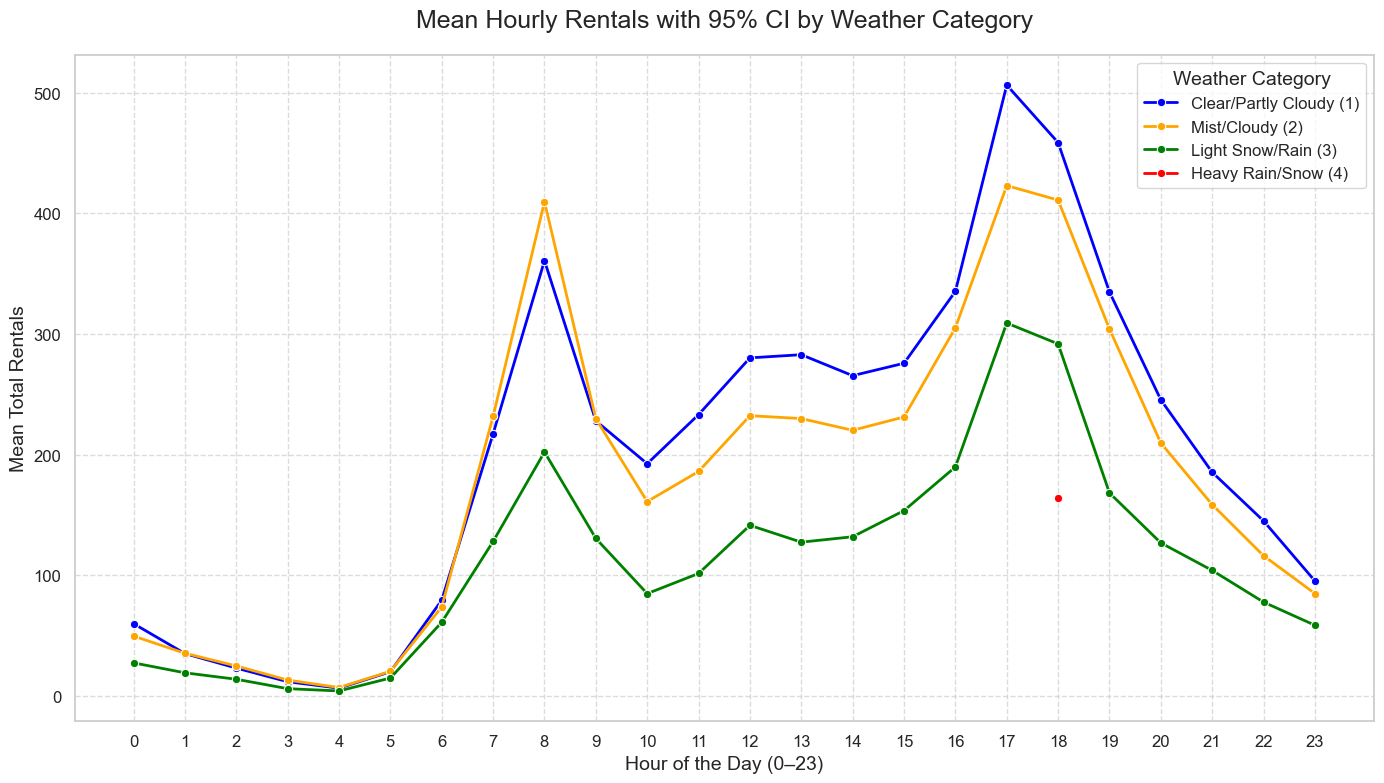

In [47]:
#6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories.
rental_weather = data.groupby(['hour', 'weather'])['count'].mean().reset_index()

weather_colors = {
    1: 'blue',    # Clear/Partly Cloudy
    2: 'orange',  # Mist/Cloudy
    3: 'green',   # Light Snow/Rain
    4: 'red'      # Heavy Rain/Snow
}

plt.figure(figsize=(14, 8))

for weather, color in weather_colors.items():
    subset = rental_weather[rental_weather['weather'] == weather]
    sns.lineplot(
        data=subset,
        x='hour',
        y='count',
        color=color,
        marker='o',
        linewidth=2,
        label={
            1: 'Clear/Partly Cloudy (1)',  
            2: 'Mist/Cloudy (2)',         
            3: 'Light Snow/Rain (3)',     
            4: 'Heavy Rain/Snow (4)'
        }[weather]
    )

plt.title('Mean Hourly Rentals with 95% CI by Weather Category', fontsize=18, pad=20)
plt.xlabel('Hour of the Day (0–23)', fontsize=14)
plt.ylabel('Mean Total Rentals', fontsize=14)

plt.legend(
    title='Weather Category',
    title_fontsize=14,
    fontsize=12,
    loc='upper right'
)

plt.xticks(ticks=range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Daily Patterns**  
Clear peaks in morning (8 AM) and evening (5–6 PM) across all weather types, reflecting commuting patterns.  
Rentals are lowest at night (0–5 AM).  
**Severe Weather Effect**  
Adverse conditions (Weather 3 and 4) sharply reduce demand, especially during peak hours.

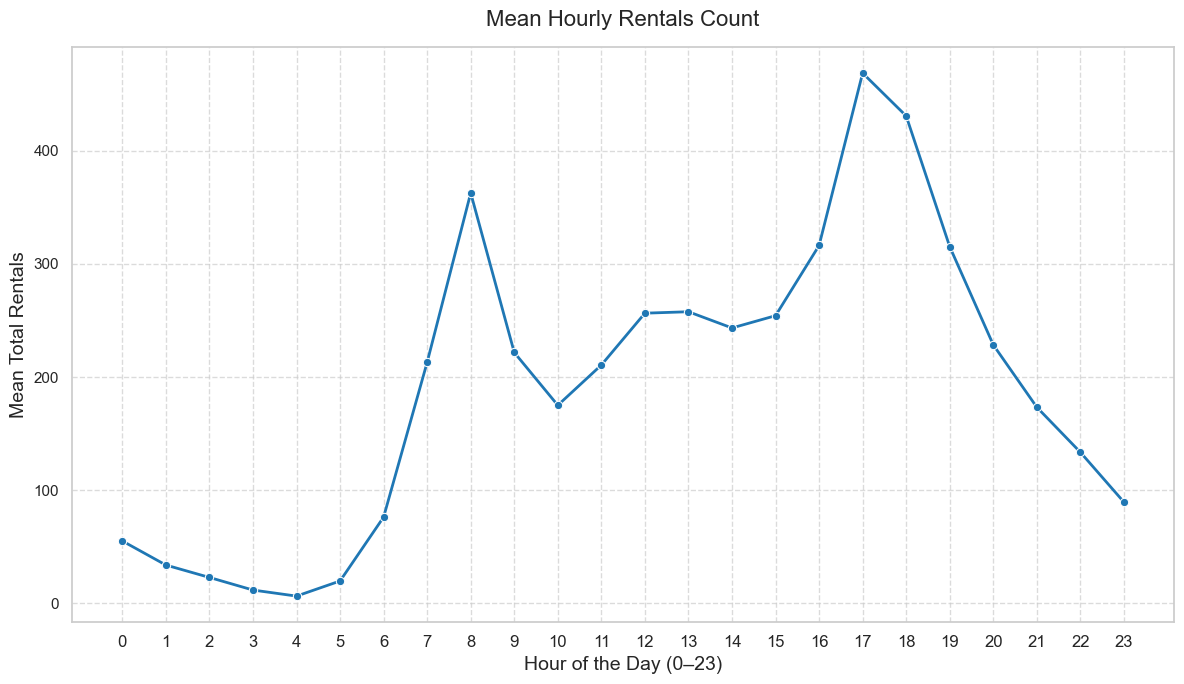

In [48]:
#7. Plot the the mean of the hourly total rentals count versus the hour of the day.
#17:00 of the day has the highest rentals count.
rental_hour = data.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=rental_hour, x='hour', y='count', marker='o', color='#1f77b4', linewidth=2)

plt.title('Mean Hourly Rentals Count', fontsize=16, pad=15)
plt.xlabel('Hour of the Day (0–23)', fontsize=14)
plt.ylabel('Mean Total Rentals', fontsize=14)
plt.xticks(ticks=range(0, 24), fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

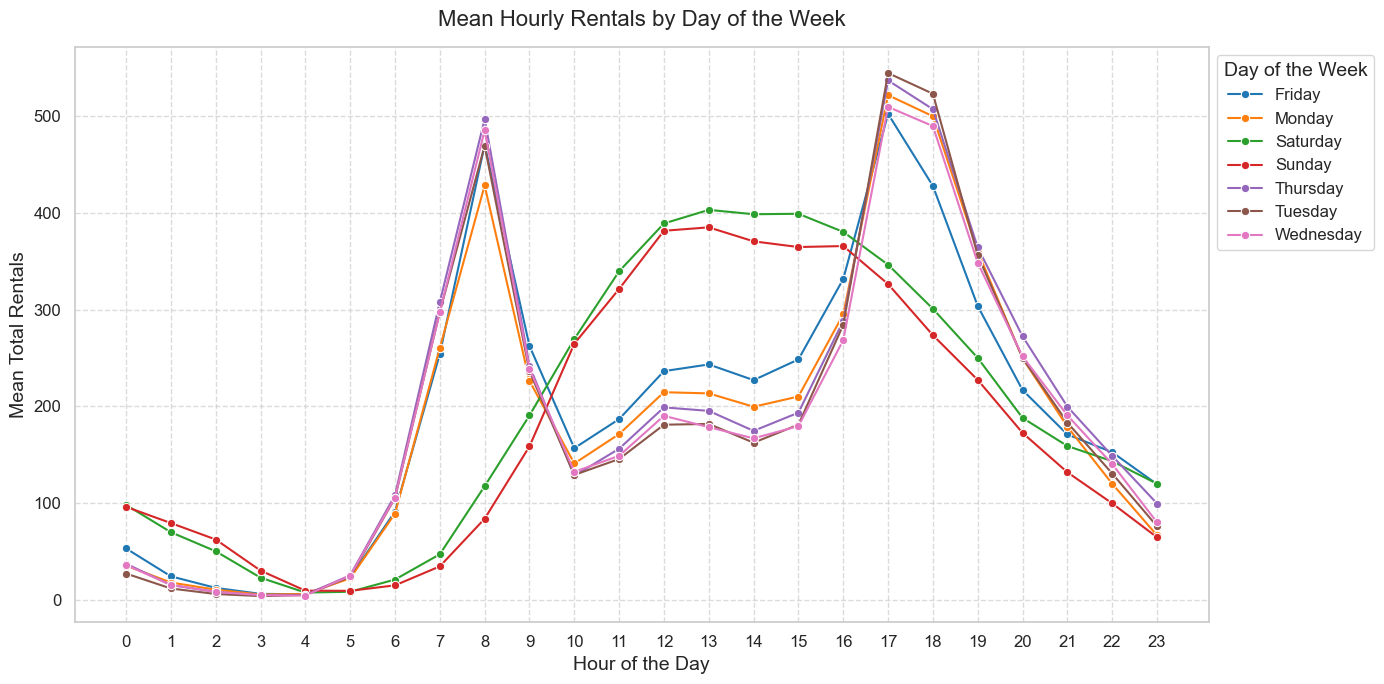

In [49]:
#8. Plot the mean of the hourly total rentals count versus the hour of the day for different days of the week.
rental_day = data.groupby(['hour', 'day_name'])['count'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=rental_day, 
    x='hour', 
    y='count', 
    hue='day_name', 
    palette='tab10', 
    marker='o'
)

plt.title('Mean Hourly Rentals by Day of the Week', fontsize=16, pad=15)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Mean Total Rentals', fontsize=14)
plt.xticks(ticks=range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.legend(
    title='Day of the Week',
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()

plt.show()

Rentals peak during morning (8 AM) and evening (5–6 PM) on weekdays due to commuting.  
Weekends show a flatter trend with rentals spread throughout the day, peaking in the afternoon.  
Late-night and early-morning rentals (12–5 AM) are consistently low across all days.  

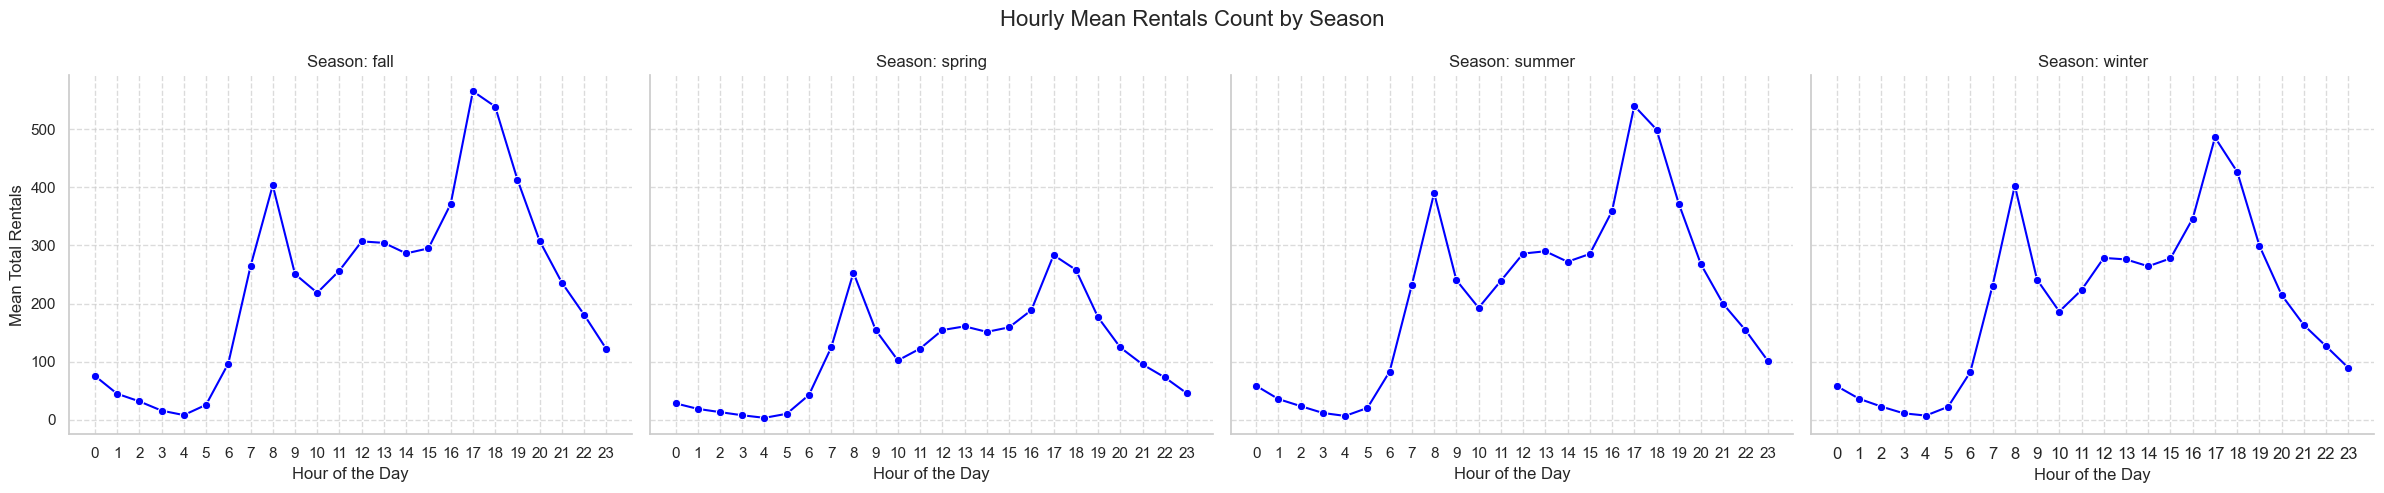

In [50]:
#9. Plot the multi-panel figure for four seasons. 
rental_season = data.groupby(['hour', 'season'])['count'].mean().reset_index()

g = sns.FacetGrid(
    rental_season, 
    col='season', 
    height=5, 
    aspect=1.2, 
    sharey=True
)

g.map_dataframe(
    sns.lineplot, 
    x='hour', 
    y='count', 
    marker='o', 
    color='b'
)

def add_grid(*args, **kwargs):
    plt.grid(visible=True, linestyle='--', alpha=0.7)

g.map(add_grid)

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
g.set_titles(col_template='Season: {col_name}')
g.set_axis_labels('Hour of the Day', 'Mean Total Rentals')
plt.xticks(ticks=range(0, 24), fontsize=12)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Hourly Mean Rentals Count by Season', fontsize=16)

plt.show()

**Two Peaks** - Rentals peak during morning (8 AM) and evening (5–6 PM), reflecting commute times.  
**Seasonal Trends** - Fall and summer see the highest activity, while spring has the lowest.  
**Low Activity** - Rentals are minimal late at night and early morning (12–5 AM).

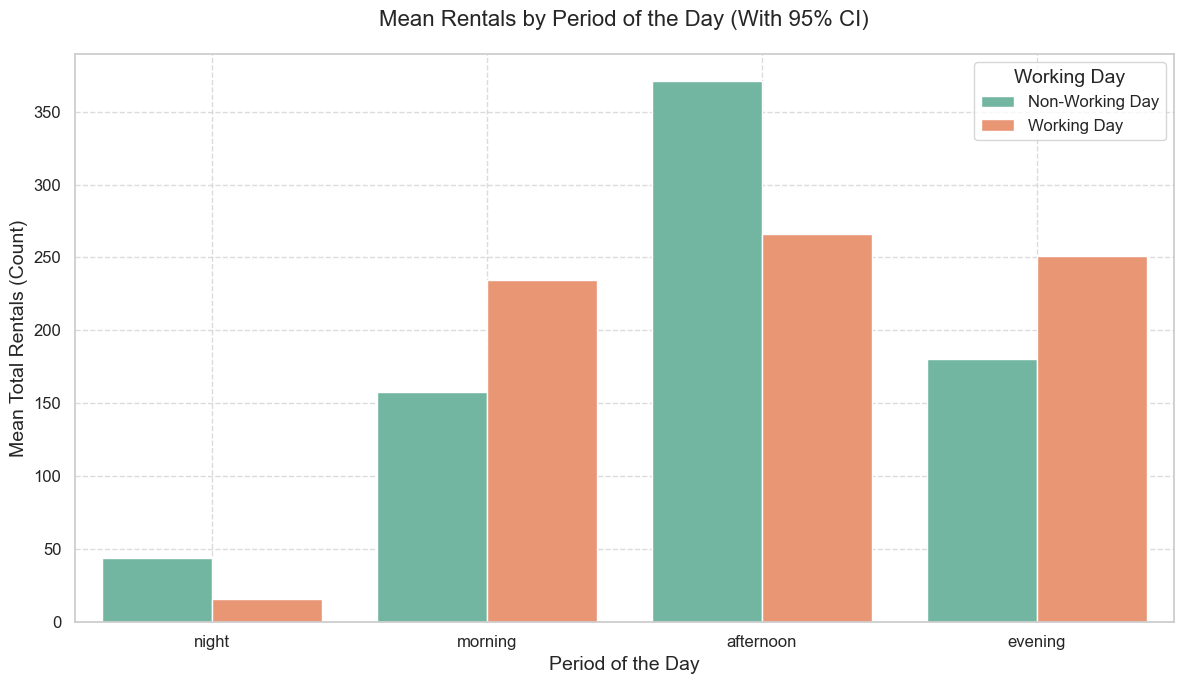

In [51]:
#10. Plot the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column
#Afternoon has the highest rentals count on both working and non-working days.
rental_period = data.groupby(['day_period', 'workingday'])['count'].mean().reset_index()

palette = {'Non-Working Day': '#66c2a5', 'Working Day': '#fc8d62'}

rental_period['workingday'] = rental_period['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

plt.figure(figsize=(12, 7))
sns.barplot(
    data=rental_period,
    x='day_period', 
    y='count', 
    hue='workingday', 
    errorbar=('ci', 95), 
    palette=palette,
)

plt.title('Mean Rentals by Period of the Day (With 95% CI)', fontsize=16, pad=20)
plt.xlabel('Period of the Day', fontsize=14)
plt.ylabel('Mean Total Rentals (Count)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.legend(
    title='Working Day',
    loc='upper right',
    fontsize=12,
    title_fontsize=14
)

plt.tight_layout()
plt.show()

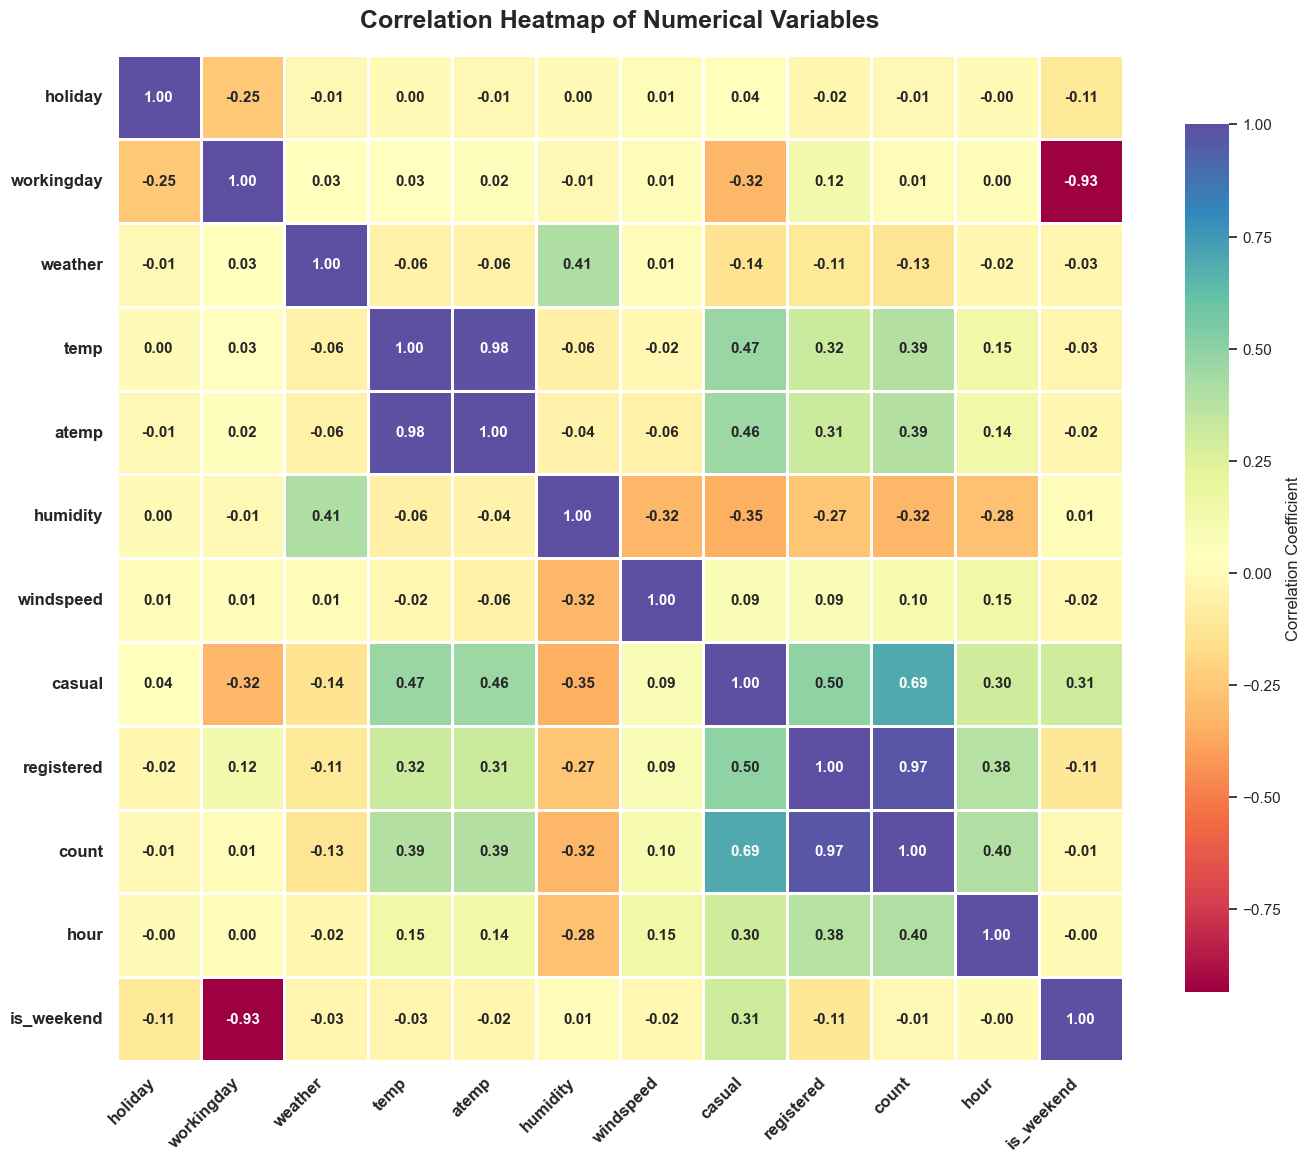

In [52]:
#11. Plot a heatmap for the correlation matrix of the dataset numerical variables.
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="Spectral", #"coolwarm"， "viridis"， "cividis"， "RdBu_r"， "Spectral"
    square=True, 
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    linewidths=0.8, 
    annot_kws={"fontsize": 11, "fontweight": "bold"}
)

plt.title(
    "Correlation Heatmap of Numerical Variables", 
    fontsize=18, 
    fontweight='bold', 
    pad=20,
    loc='center'
)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=12, rotation=0, fontweight='bold')

plt.tight_layout()
plt.show()

**Strong correlations** - count is strongly influenced by registered (0.97) and casual (0.69).  
**Negative correlations** - Higher humidity reduces rentals (casual: -0.35, registered: -0.27).  
**Weak correlations** - holiday and windspeed have minimal impact on other variables.  
**Key factors** - Temperature and time (hour) are significant for rentals, especially for casual users.  
    Registered users dominate the overall count.